<a href="https://colab.research.google.com/github/iqbalamo93/keras_RNN/blob/master/RNN_Sinewave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.linspace(0,50,501)

In [4]:
y= np.sin(x)

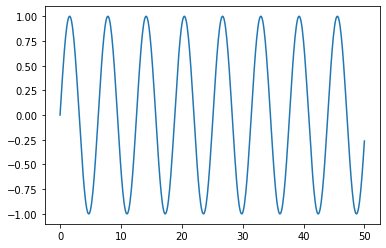

In [5]:
plt.plot(x,y)

In [6]:
df = pd.DataFrame(data=y, index=x,columns=['Sine'])

In [7]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [8]:
test_percentage =0.1

In [9]:
test_points = np.round(len(df)*test_percentage)

In [10]:
test_ind = int(len(df)-test_points)

In [11]:
train = df.iloc[:test_ind]

In [12]:
test = df.iloc[test_ind:]

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaled_train = scaler.fit_transform(train)

In [16]:
scaled_test = scaler.transform(test)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
#help(TimeseriesGenerator)

In [19]:
length = 25 #input lrngth
batch_size = 1 # How many batches we are returning 

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=batch_size)

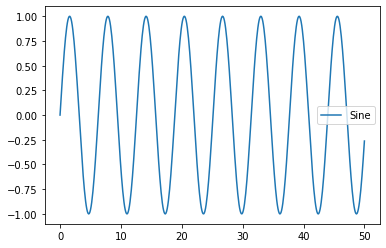

In [20]:
df.plot()

In [21]:
length = 50 #input lrngth
batch_size = 1 # How many batches we are returning 

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=batch_size)

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.layers import Dense, SimpleRNN ,LSTM

In [25]:
n_features=1
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [26]:
model. summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit_generator(generator,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
401/401 [==============================] - 3s 7ms/step - loss: 0.0064
Epoch 2/5
401/401 [==============================] - 3s 7ms/step - loss: 2.4555e-04
Epoch 3/5
401/401 [==============================] - 3s 7ms/step - loss: 9.3555e-05
Epoch 4/5
401/401 [==============================] - 3s 7ms/step - loss: 0.0021
Epoch 5/5
401/401 [==============================] - 3s 7ms/step - loss: 4.8899e-05


In [28]:
loss =pd.DataFrame(model.history.history)

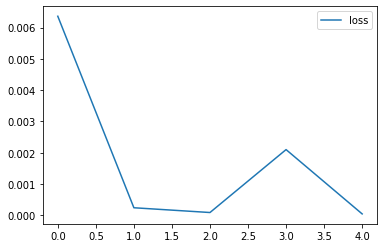

In [29]:
loss.plot()

In [30]:
first_eval_batch =scaled_train[-length:]


In [31]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [32]:
model.predict(first_eval_batch)

array([[0.95005006]], dtype=float32)

In [33]:
scaled_test[0]

array([0.94955134])

In [34]:
test_predictions = []

first_eval_batch = scaled_train[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [35]:
test_predictions

[array([0.95005006], dtype=float32),
 array([0.9695182], dtype=float32),
 array([0.9841733], dtype=float32),
 array([0.994247], dtype=float32),
 array([0.9993408], dtype=float32),
 array([0.9994683], dtype=float32),
 array([0.99486816], dtype=float32),
 array([0.98544425], dtype=float32),
 array([0.9714363], dtype=float32),
 array([0.9531411], dtype=float32),
 array([0.9307133], dtype=float32),
 array([0.9043852], dtype=float32),
 array([0.8746819], dtype=float32),
 array([0.84183675], dtype=float32),
 array([0.8059689], dtype=float32),
 array([0.7675633], dtype=float32),
 array([0.72696245], dtype=float32),
 array([0.6844714], dtype=float32),
 array([0.64052474], dtype=float32),
 array([0.5953688], dtype=float32),
 array([0.54935086], dtype=float32),
 array([0.502973], dtype=float32),
 array([0.4566277], dtype=float32),
 array([0.410661], dtype=float32),
 array([0.36562648], dtype=float32),
 array([0.32194906], dtype=float32),
 array([0.28003618], dtype=float32),
 array([0.24042806], 

In [36]:
true_predictions = scaler.inverse_transform(test_predictions)

In [37]:
test['predictions'] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


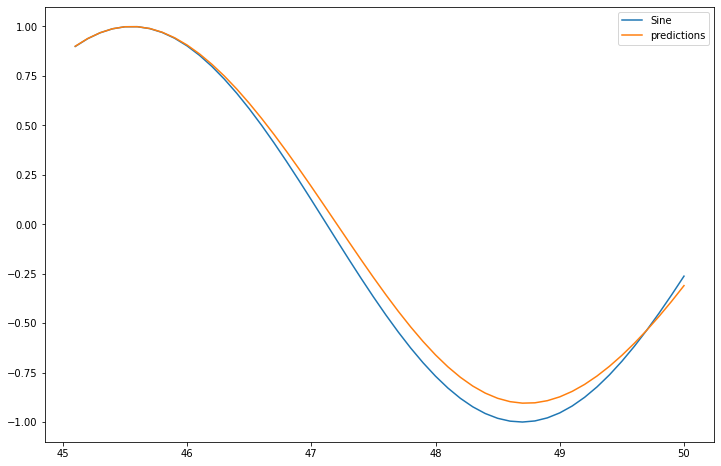

In [38]:
test.plot(figsize=(12,8))

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [41]:
length =49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                           length=length,batch_size=1)

In [42]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [43]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 8s 19ms/step - loss: 0.0083 - val_loss: 2.1323e-06
Epoch 2/20
402/402 [==============================] - 6s 16ms/step - loss: 9.5968e-05 - val_loss: 1.2453e-04
Epoch 3/20
402/402 [==============================] - 6s 15ms/step - loss: 5.0045e-04 - val_loss: 6.0337e-05


In [44]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


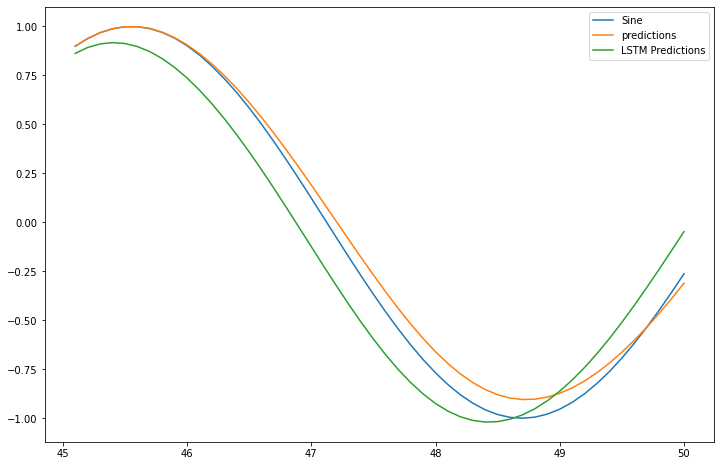

In [45]:
# IGNORE WARNINGS
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [46]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [47]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [48]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

Epoch 1/6
452/452 [==============================] - 8s 18ms/step - loss: 0.0145
Epoch 2/6
452/452 [==============================] - 7s 15ms/step - loss: 3.1070e-04
Epoch 3/6
452/452 [==============================] - 7s 15ms/step - loss: 2.5978e-04
Epoch 4/6
452/452 [==============================] - 7s 15ms/step - loss: 8.1991e-05
Epoch 5/6
452/452 [==============================] - 7s 15ms/step - loss: 4.9157e-05
Epoch 6/6
452/452 [==============================] - 7s 15ms/step - loss: 3.7484e-04


In [49]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [50]:
forecast = scaler.inverse_transform(forecast)

In [53]:
25*.1

2.5

In [51]:
forecast_index = np.arange(50.1,52.6,step=0.1)

In [52]:
len(forecast_index)

25

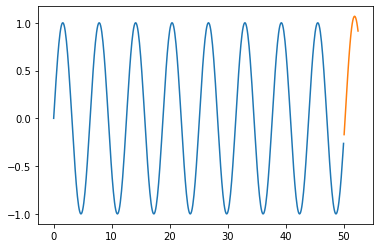

In [54]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)

In [ ]:
gi